## Ejercicio 1


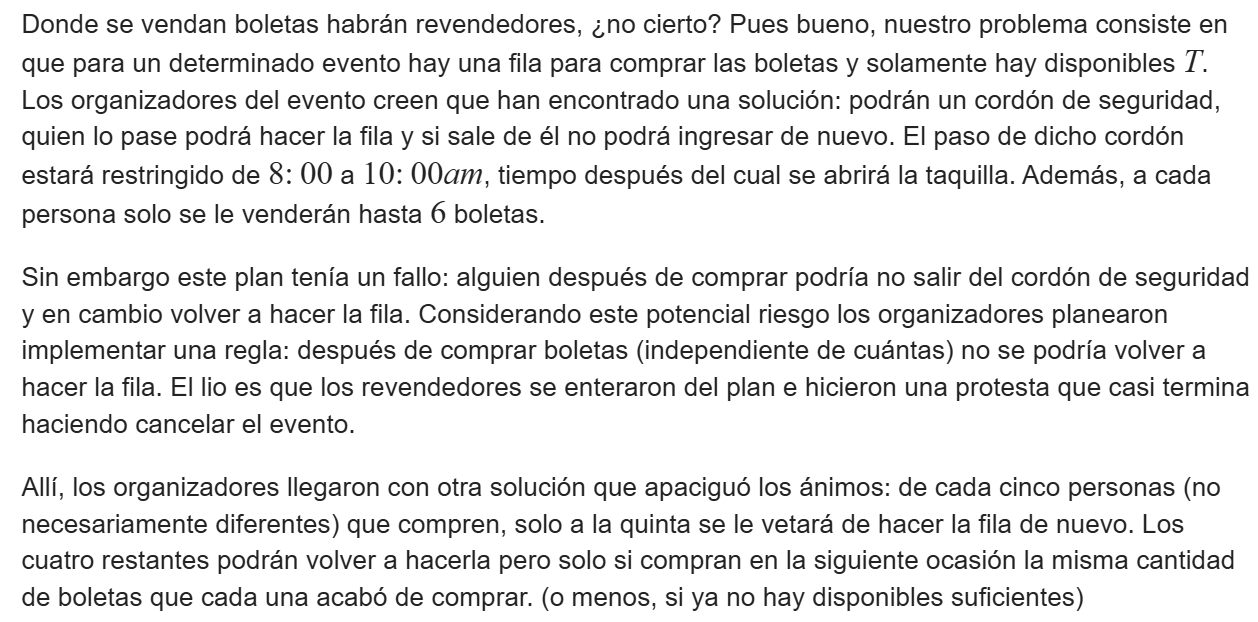

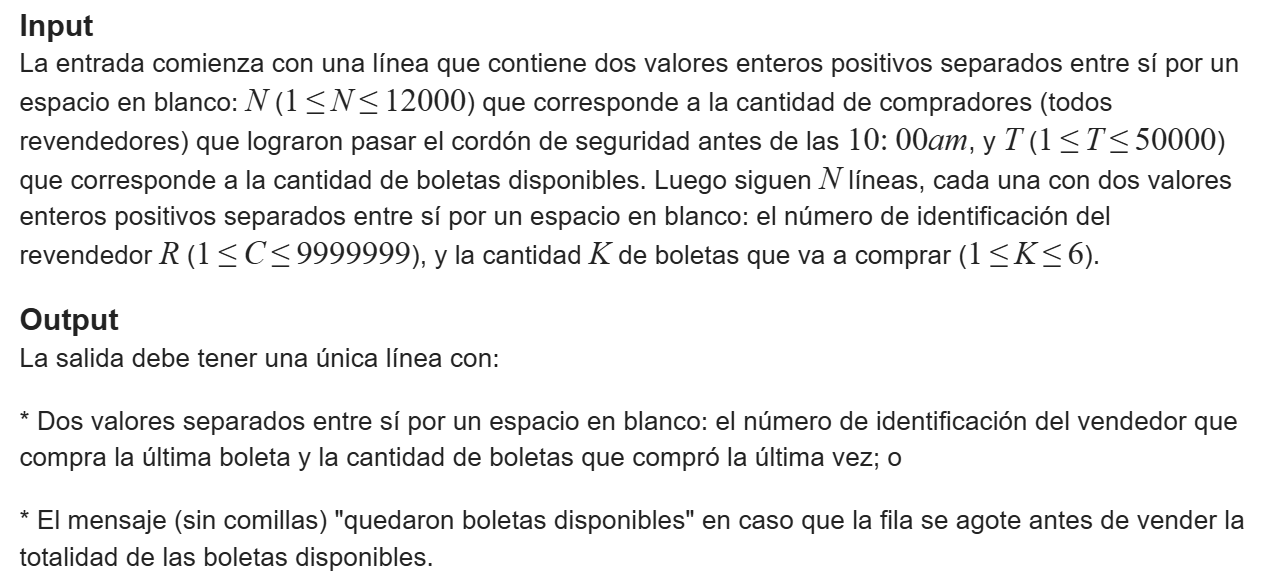

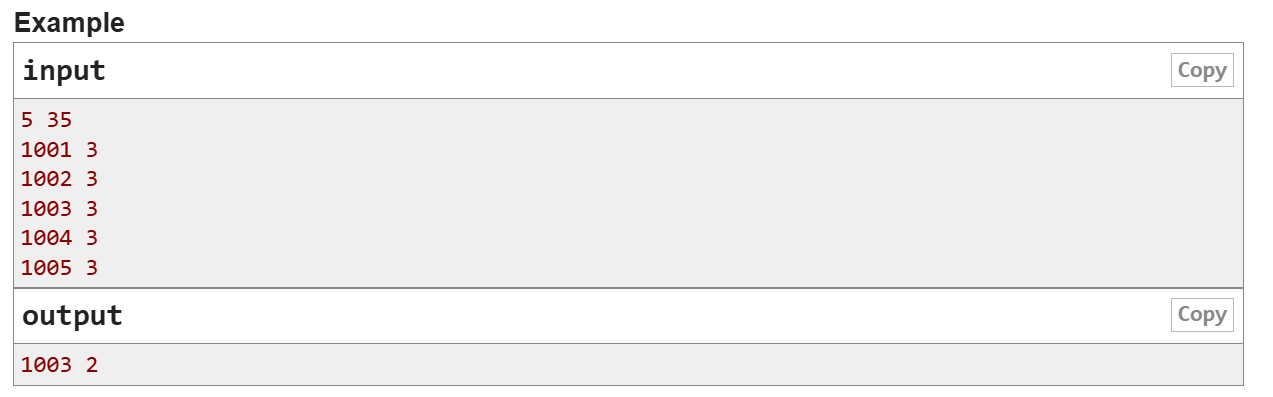

In [21]:
from collections import deque

def sell_tickets(n, t):
  queue = deque()
  count = 0  # Contador regla 5ta persona
  for _ in range(n):
    id, k = map(int, input().split())
    queue.append((id, k))

  while queue and t > 0:
    id, k = queue.popleft()
    count += 1
    if k > t:
      k = t
    t -= k
    if count % 5 != 0:
      queue.append((id, k))

  if t == 0:
    id, k = queue[-1]
    print(id, k)
  else:
    print("quedaron boletas disponibles")


n, t = map(int, input().split())


sell_tickets(n, t)

1003 2


## Ejercicio 2

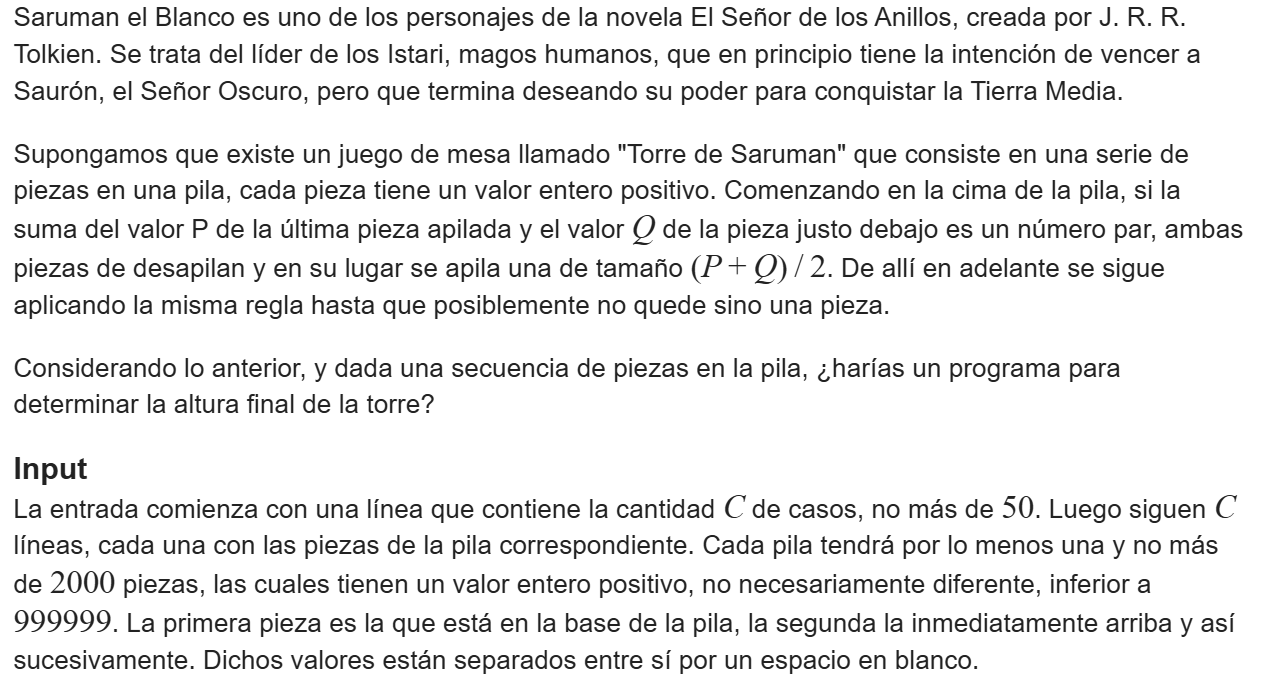

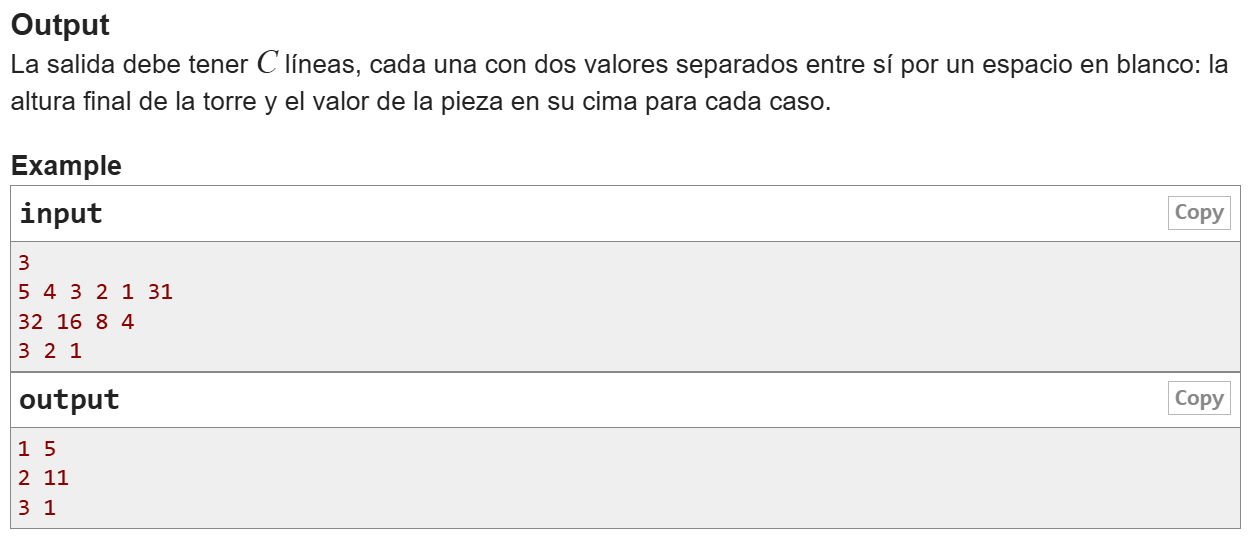

In [26]:
def torre_de_saruman(casos):
    resultados = []

    for caso in casos:
        # Convertir la lista de números en una pila
        pila = caso[:]

        while len(pila) > 1:
            # Tomar las dos últimas piezas
            P = pila.pop()
            Q = pila.pop()

            # Verificar si la suma es par
            if (P + Q) % 2 == 0:
                # Reemplazar con la nueva pieza
                nueva_pieza = (P + Q) // 2
                pila.append(nueva_pieza)
            else:
                # Si no es par, devolver las piezas a la pila
                pila.append(Q)
                pila.append(P)
                break

        # Guardar la altura final y la cima de la pila
        resultados.append((len(pila), pila[-1]))

    return resultados

# Leer entrada
C = int(input())
casos = []
for _ in range(C):
    caso = list(map(int, input().split()))
    casos.append(caso)

# Procesar los casos
resultados = torre_de_saruman(casos)

# Imprimir salida
for altura, cima in resultados:
    print(altura, cima)


1 5
2 11
3 1


## Ejercicio 3

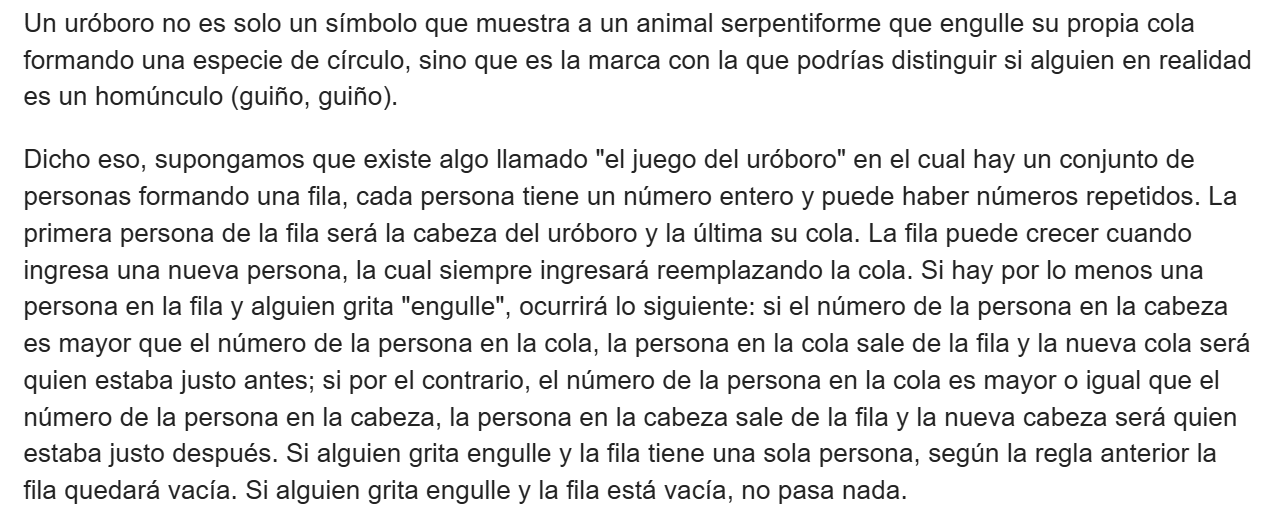

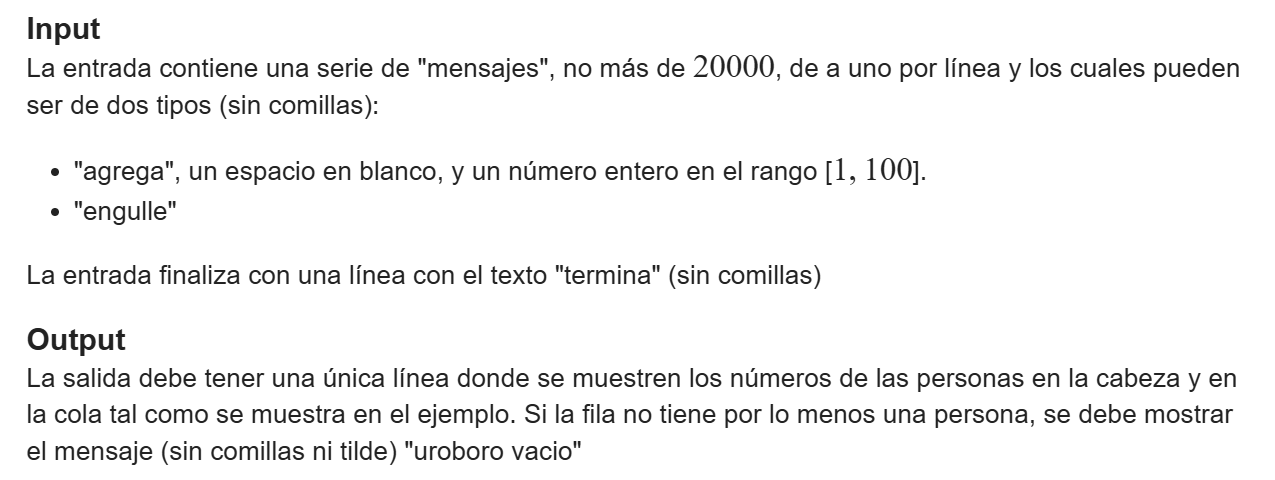

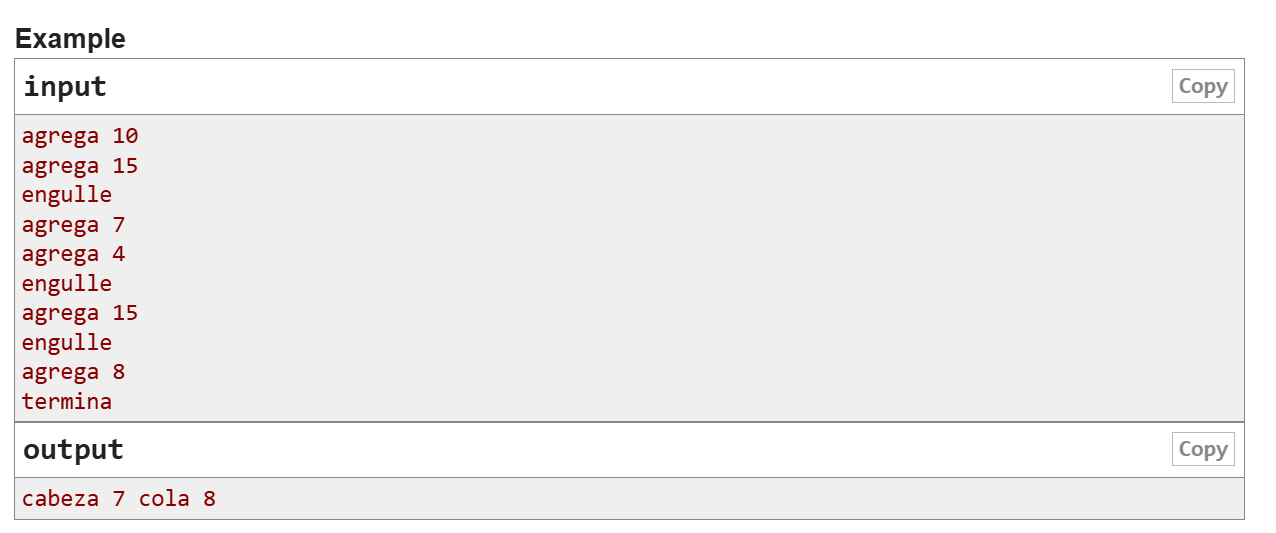

In [9]:
def juego_uroboro():
    fila = []
    while True:
        linea = input()
        if linea == "termina":
            break
        comando, *numero = linea.split()
        if comando == "agrega":
            fila.append(int(numero[0]))
        elif comando == "engulle":
            if len(fila) > 0:
                if len(fila) == 1:
                    fila.clear()
                elif fila[0] > fila[-1]:
                    fila.pop()
                else:
                    fila.pop(0)

    if not fila:
        print("uroboro vacio")
    else:
        print(f"cabeza {fila[0]} cola {fila[-1]}")

if __name__ == "__main__":
    juego_uroboro()

cabeza 10 cola 10


## Ejercicio 4

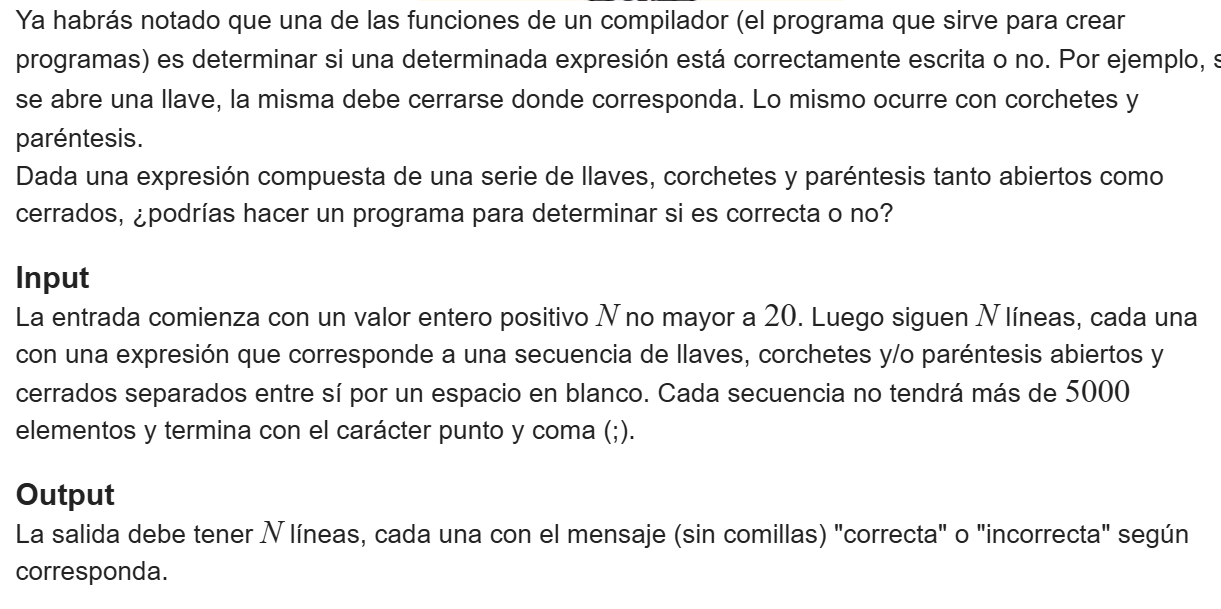

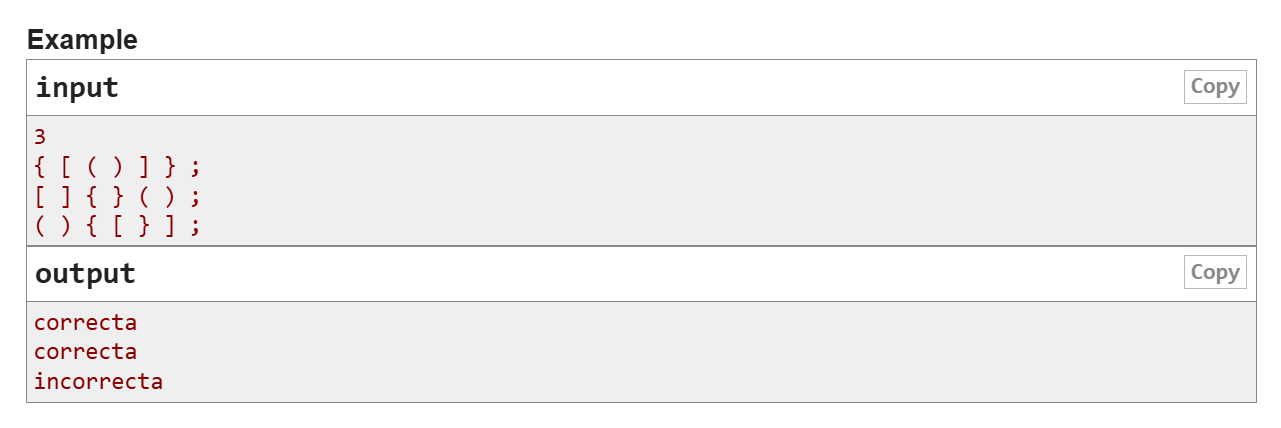

In [12]:
def es_correcta(expresion):
    pila = []
    parentesis = {'{': '}', '[': ']', '(': ')'}
    
    for char in expresion:
        if char in parentesis:  # Es un carácter de apertura
            pila.append(char)
        elif char in parentesis.values():  # Es un carácter de cierre
            if not pila:  # Pila vacía
                return False
            ultimo_abierto = pila.pop()
            if parentesis[ultimo_abierto] != char:
                return False
    
    return not pila  # Si la pila está vacía al final, la expresión es correcta

def main():
    N = int(input())
    for _ in range(N):
        expresion = input()
        if es_correcta(expresion):
            print("correcta")
        else:
            print("incorrecta")

if __name__ == "__main__":
    main()

correcta
correcta
incorrecta


## Ejercicio 5

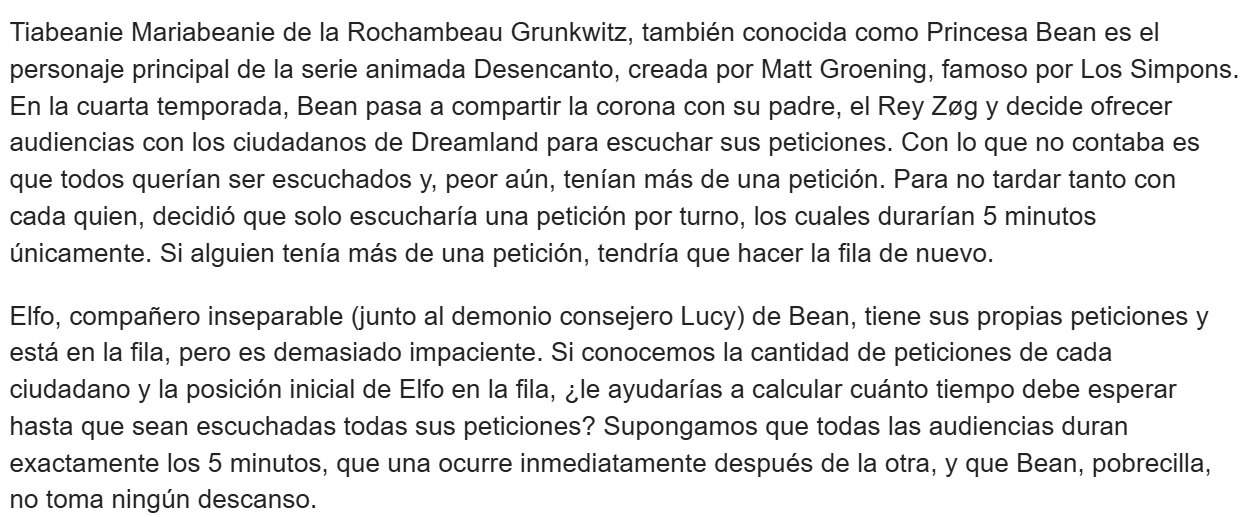

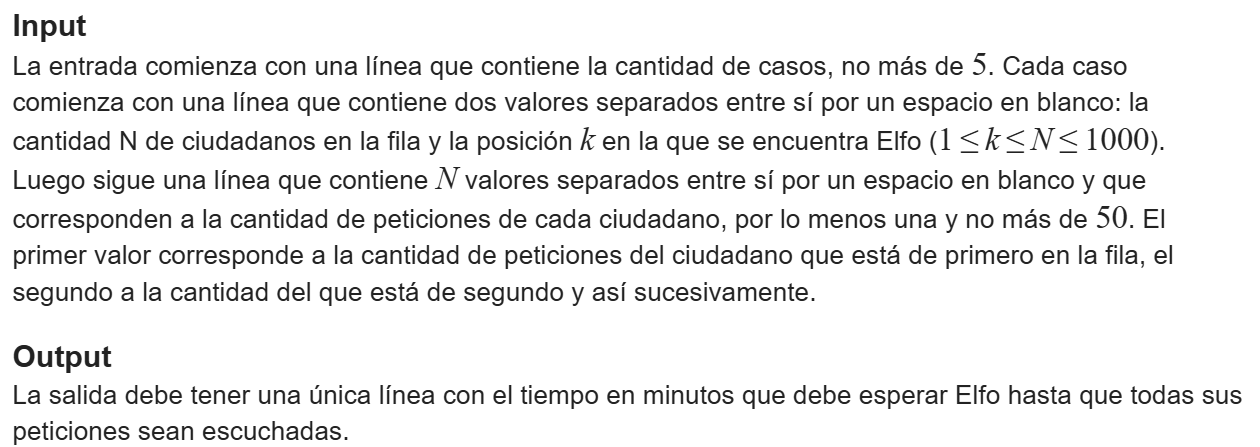

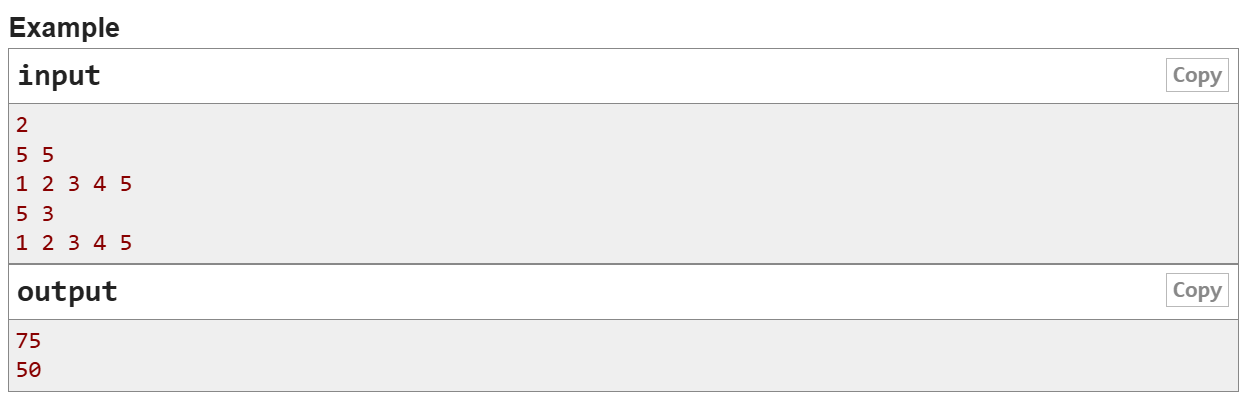

In [14]:
def tiempo_espera_elfo(casos):
    resultados = []
    
    for caso in casos:
        N, k, peticiones = caso
        tiempo_total = 0
        cola = [(i, peticiones[i]) for i in range(N)]  # Crear la cola como una lista de tuplas (posición, peticiones)
        elfo_pos = k - 1  # Convertir a índice basado en 0

        while True:
            pos_actual, peticion_actual = cola.pop(0)  # Sacar el ciudadano al frente de la cola
            tiempo_total += 5  # Cada turno dura 5 minutos
            peticion_actual -= 1  # Reducir una petición de este ciudadano
            
            if pos_actual == elfo_pos and peticion_actual == 0:
                # Si es Elfo y se terminaron sus peticiones, se calcula el tiempo
                resultados.append(tiempo_total)
                break
            elif peticion_actual > 0:
                # Si aún le quedan peticiones, vuelve al final de la cola
                cola.append((pos_actual, peticion_actual))
    
    return resultados

# Leer entrada
C = int(input())
casos = []
for _ in range(C):
    # Leer N y k
    N, k = map(int, input().split())
    # Leer las peticiones de los ciudadanos
    peticiones = list(map(int, input().split()))
    casos.append((N, k, peticiones))

# Calcular los tiempos de espera
resultados = tiempo_espera_elfo(casos)

# Imprimir los resultados
for tiempo in resultados:
    print(tiempo)


75
50


## Ejercicio 6

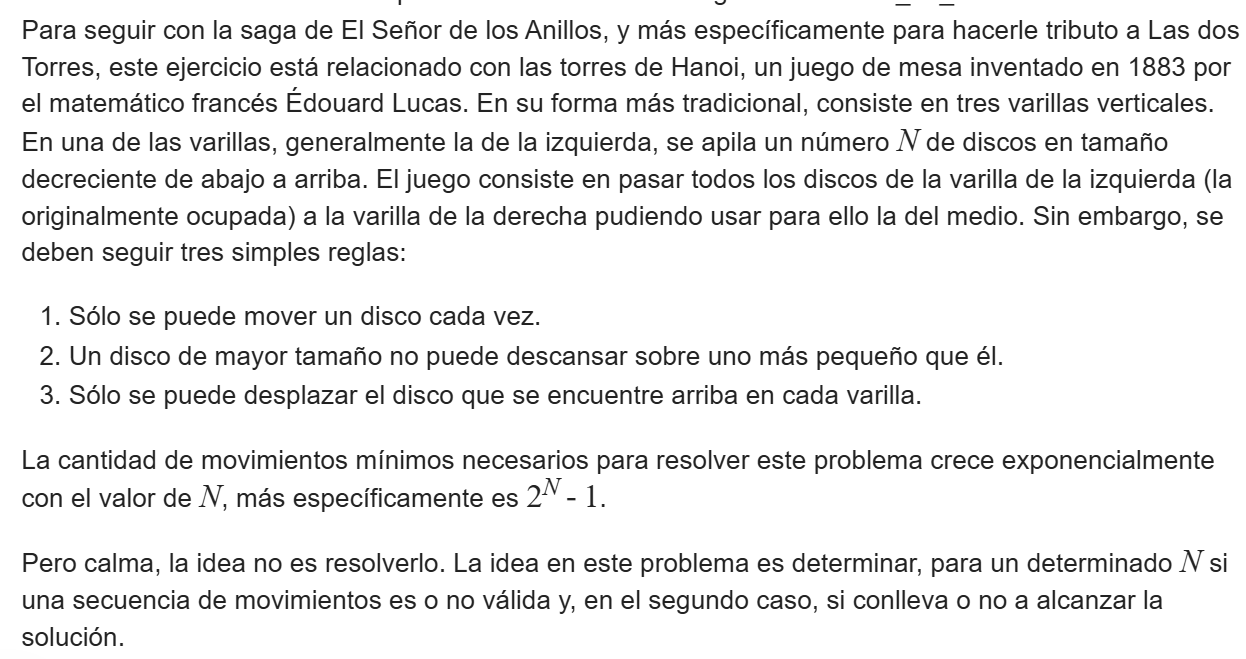

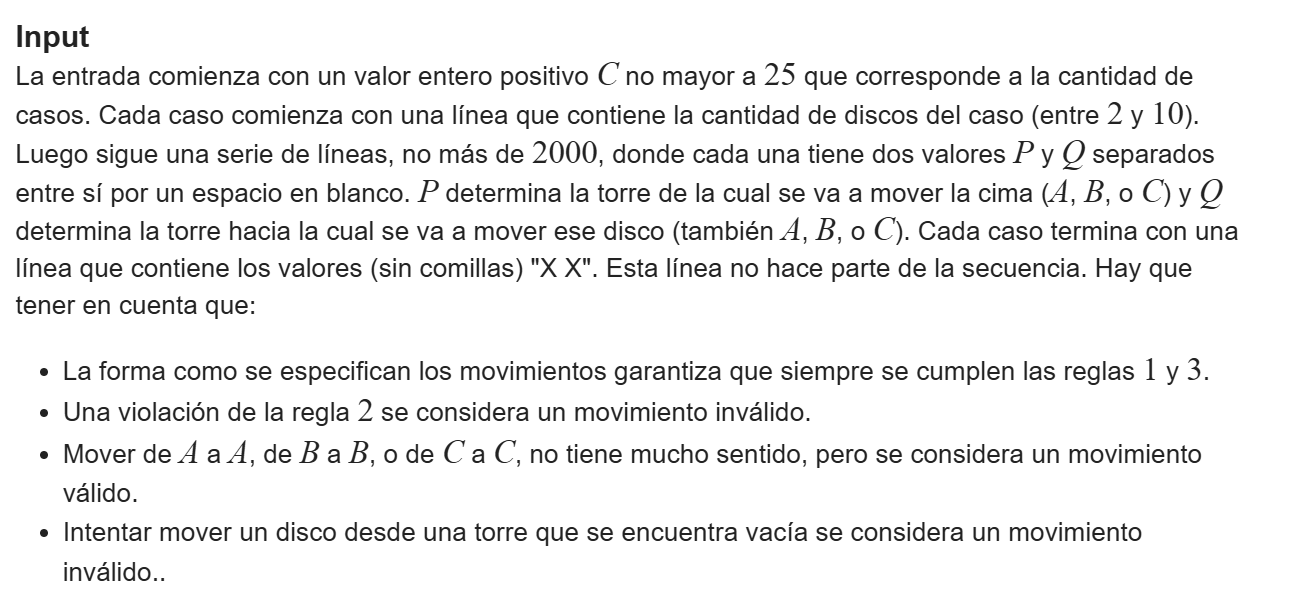

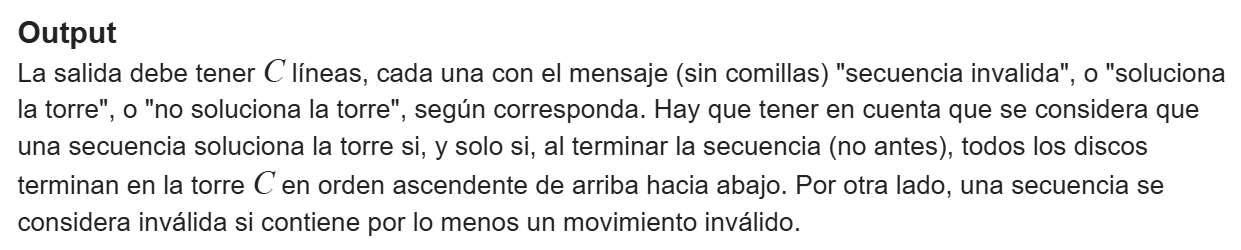

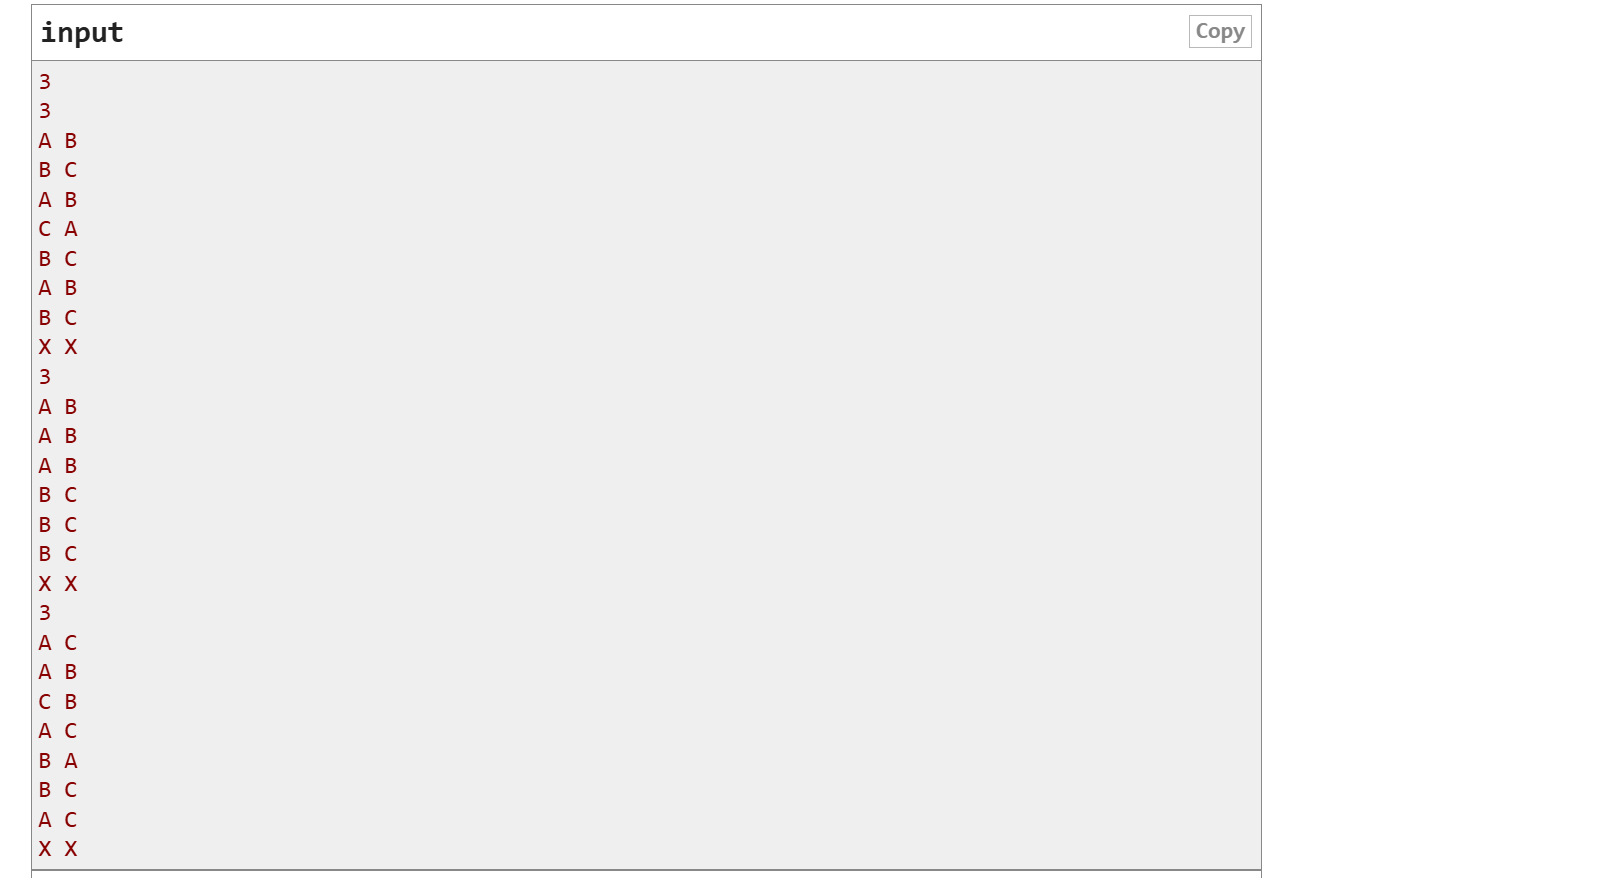

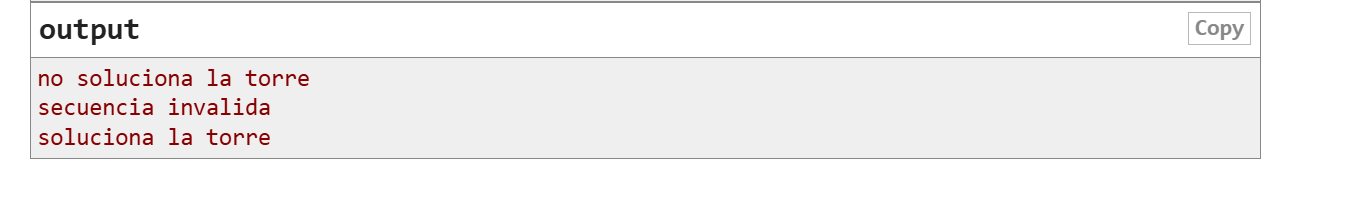

In [ ]:
def valida_torre_hanoi(casos):
    resultados = []

    for caso in casos:
        N, movimientos = caso

        # Inicializar las torres
        torres = {
            'A': list(range(N, 0, -1)),  # La torre A comienza con todos los discos
            'B': [],
            'C': []
        }

        secuencia_valida = True

        for movimiento in movimientos:
            origen, destino = movimiento

            if origen == destino:
                continue  # Movimiento de una torre a sí misma es válido pero no tiene sentido

            if not torres[origen]:
                # Intentar mover desde una torre vacía
                secuencia_valida = False
                break

            disco = torres[origen][-1]

            if torres[destino] and torres[destino][-1] < disco:
                # Intentar mover un disco más grande sobre uno más pequeño
                secuencia_valida = False
                break

            # Movimiento válido, mover el disco
            torres[origen].pop()
            torres[destino].append(disco)

        if not secuencia_valida:
            resultados.append("secuencia invalida")
        elif torres['C'] == list(range(N, 0, -1)):
            resultados.append("soluciona la torre")
        else:
            resultados.append("no soluciona la torre")

    return resultados

# Leer entrada
C = int(input())
casos = []
for _ in range(C):
    N = int(input())
    movimientos = []
    while True:
        movimiento = input().strip()
        if movimiento == "X X":
            break
        origen, destino = movimiento.split()
        movimientos.append((origen, destino))
    casos.append((N, movimientos))

# Procesar los casos
resultados = valida_torre_hanoi(casos)

# Imprimir resultados
for resultado in resultados:
    print(resultado)